 ![](../images/itam_logo.png)
 
 ## EDA 
 
 ### Data Profiling
 
 Jugaremos con los datos del Titanic para hacer EDA y GEDA. Los datos se encuentran cargados en el dropbox (`titanic.csv`).
 
 Ocuparemos la librería `seaborn` que permite visualizar datos en python. Para instalar esta librería en tu ambiente basta con poner `pip install seaborn`.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
titanic = pd.read_csv('/home/silil/Documents/itam/mineria_datos_licenciatura/data/titanic/titanic.csv')
titanic.shape

(887, 8)

In [11]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Tipo de datos

In [13]:
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

#### Limpieza de nombres de columnas

In [14]:
# Limpiar los nombres de columnas
def _cleaner(col):
    """
    Clean a specific column
    
    :param: column name to clean
    :return: column cleaned, without blank spaces, point and accents
    """
    return col.lower()\
    .replace(' ','_').replace('.','')\
    .replace('/','_').replace(';','')\
    .replace('á','a').replace('é','e')\
    .replace('í','i').replace('ó','o')\
    .replace('ú','u')

In [15]:
def clean_column_names(df):
    """
    Clean column names of a dataframe: to lower, without accents, without spaces, without punctuation signs
    
    :param: dataframe to clean column names
    :return: dataframe with clean column names
    """
    cols = {col_name: _cleaner(col_name) for col_name in df.columns.values}
    return df.rename(columns=cols, inplace=True)

In [16]:
clean_column_names(titanic)

In [17]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'siblings_spouses_aboard',
       'parents_children_aboard', 'fare'],
      dtype='object')

#### Tipos de variables

In [9]:
# variables numéricas
number_variables = titanic.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(6, array(['survived', 'pclass', 'age', 'siblings_spouses_aboard',
        'parents_children_aboard', 'fare'], dtype=object))

In [10]:
# variables categóricas
category_variables = titanic.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(0, array([], dtype=object))

In [11]:
# fechas 
dates_variables = titanic.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(0, array([], dtype=object))

In [12]:
# strings 
string_variables = titanic.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(2, array(['name', 'sex'], dtype=object))

In [13]:
# verify if we check for all the types
if (sum([len(number_variables), len(category_variables), 
      len(dates_variables), len(string_variables)]) == titanic.shape[1]): 
    print('ok')
else:
    print('columns missing')

ok


### Data profiling

+ Categóricas

In [14]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head(3)
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'
        

In [15]:
# con talacha
def category_profiling(df, col):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'mode': df[col].mode().values,
                     'num_categories': df[col].nunique(),
                     'categories': df[col].unique(),
                     'uniques': df[col].nunique(),
                     'missings': df[col].isna().sum()/df[col].size*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    return profiling

In [16]:
category_profiling_output = {elem: category_profiling(titanic, elem)\
                             for elem in string_variables}

In [17]:
category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,name,sex
0,mode,"[Capt. Edward Gifford Crosby, Col. John Weir, ...",[male]
1,num_categories,887,2
2,categories,"[Mr. Owen Harris Braund, Mrs. John Bradley (Fl...","[male, female]"
3,uniques,887,2
4,missings,0,0
5,top1_repeated,the Countess. of (Lucy Noel Martha Dyer-Edward...,male
6,top2_repeated,Mr. Benjamin Laventall Foreman,female
7,top3_repeated,Mr. Charles Alexander Fortune,undefined


In [18]:
# con talacha
def numeric_profiling(df, col):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    
    return profiling

In [19]:
profiling_dict = {}

numeric_profiling_output = {elem: numeric_profiling(titanic, elem)\
                            for elem in number_variables}

In [20]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,survived,pclass,age,siblings_spouses_aboard,parents_children_aboard,fare
0,max,1,3.000000,80.000000,8.000000,6.000000,512.329200
1,min,0,1.000000,0.420000,0.000000,0.000000,0.000000
2,mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.305420
3,stdv,0.487004,0.836662,14.121908,1.104669,0.807466,49.782040
4,25%,0,2.000000,20.250000,0.000000,0.000000,7.925000
5,median,0,3.000000,28.000000,0.000000,0.000000,14.454200
6,75%,1,3.000000,38.000000,1.000000,0.000000,31.137500
7,kurtosis,-1.78218,-1.288638,0.292559,17.797537,9.723066,33.264605
8,skewness,0.470999,-0.623409,0.447189,3.686760,2.741198,4.777671
9,uniques,2,3.000000,89.000000,7.000000,7.000000,248.000000


In [21]:
### cambio de tipo (cast)
titanic.dtypes

survived                     int64
pclass                       int64
name                        object
sex                         object
age                        float64
siblings_spouses_aboard      int64
parents_children_aboard      int64
fare                       float64
dtype: object

In [24]:
titanic['survived'] = titanic.survived.astype(str)

In [25]:
titanic.dtypes

survived                    object
pclass                       int64
name                        object
sex                         object
age                        float64
siblings_spouses_aboard      int64
parents_children_aboard      int64
fare                       float64
survived_str                object
dtype: object

**Sin talacha**

Podemos ocupar el paquete [pandas_profiling](https://github.com/pandas-profiling/pandas-profiling) que ya hace el profiling en automático ;), generando un reporte en html que contiene: 


+ **Essentials:** type, unique values, missing values
+ **Quantile statistic** like minimum value, Q1, median, Q3, maximum, range, interquartile range
+ **Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
+ **Most frequent values**
+ **Histogram**
+ **Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
+ **Missing values** matrix, count, heatmap and dendrogram of missing values


In [1]:
import pandas_profiling

In [5]:
profile = titanic.profile_report()

In [28]:
profile

In [29]:
#puedes guardar la salida en un archivo html
profile.to_file("titanic_profiling.html")

### GEDA

Para instalar necesecitas poner `pip install seaborn` en tu pyenv.

In [8]:
import seaborn as sns

In [95]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Histograma de edades')

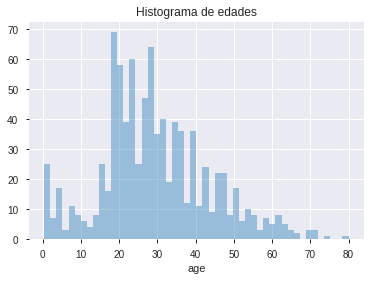

In [21]:
sns.distplot(titanic.age, bins=50, hist=True, kde=False).\
set_title("Histograma de edades")

Text(0.5, 1.0, 'Histograma de precios')

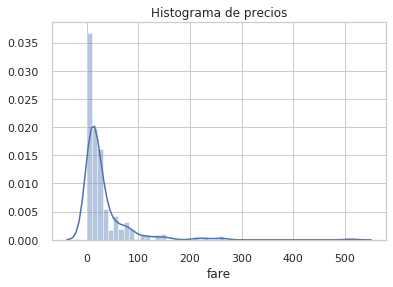

In [97]:
sns.distplot(titanic.fare, hist=True).\
set_title("Histograma de precios")

([<matplotlib.axis.XTick at 0x7fbe9e9b30d0>,
 <a list of 3 Text xticklabel objects>)

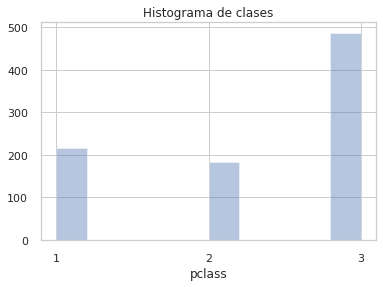

In [102]:
# también puedes ponerlo sin la distribución empírica
sns.distplot(titanic.pclass, kde=False).\
set_title("Histograma de clases")
plt.xticks(np.arange(1, 4, step=1))

Text(0.5, 1.0, 'Histograma hermanos/esposes')

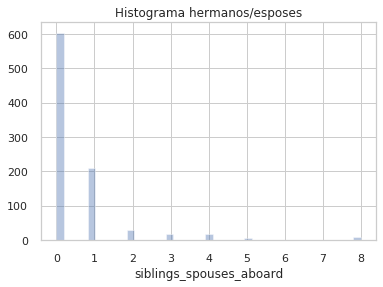

In [105]:
sns.distplot(titanic.siblings_spouses_aboard, kde=False).\
set_title("Histograma hermanos/esposes")

Text(0.5, 1.0, 'Histograma padres/hijes')

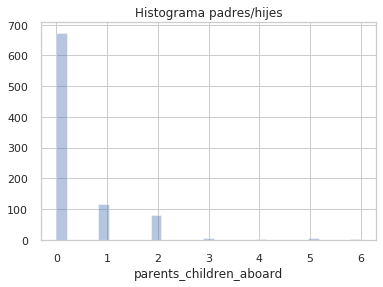

In [106]:
sns.distplot(titanic.parents_children_aboard, kde=False).\
set_title("Histograma padres/hijes")

En lugar de distplot ocupar histplot -porque distplot ya está descontinuado :(-

In [25]:
#sns.histplot(data=titanic, x='age')

**Categóricas**

Text(0.5, 1.0, 'Conteo por sexo')

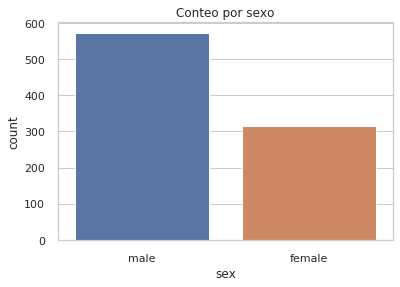

In [116]:
sns.countplot(x="sex", data=titanic).\
set_title("Conteo por sexo")

Text(0.5, 1.0, 'Conteo por sobrevivencia')

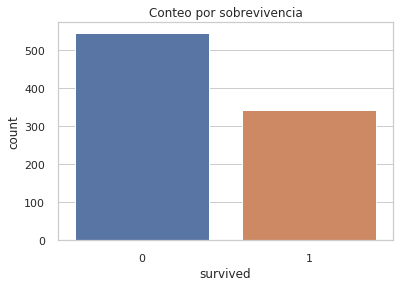

In [118]:
sns.countplot(x="survived", data=titanic).\
set_title("Conteo por sobrevivencia")

In [119]:
titanic.fare.max()

512.3292

In [121]:
titanic[titanic.fare == titanic.fare.max()]

,survived,pclass,name,sex,age,siblings_spouses_aboard,parents_children_aboard,fare
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292
676,1,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
733,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292


In [126]:
titanic[titanic.fare == titanic.fare.min()]\
.groupby(['pclass','survived'])\
.count()\
.reset_index()

,pclass,survived,name,sex,age,siblings_spouses_aboard,parents_children_aboard,fare
0,1,0,5,5,5,5,5,5
1,2,0,6,6,6,6,6,6
2,3,0,3,3,3,3,3,3
3,3,1,1,1,1,1,1,1


Q. ¿es cierto que sobrevivieron más mujeres que hombres?

In [127]:
titanic\
.groupby(['sex', 'survived'])\
.count()\
.reset_index()

,sex,survived,pclass,name,age,siblings_spouses_aboard,parents_children_aboard,fare
0,female,0,81,81,81,81,81,81
1,female,1,233,233,233,233,233,233
2,male,0,464,464,464,464,464,464
3,male,1,109,109,109,109,109,109


Text(0.5, 1.0, 'Sobrevivieron más mujeres que hombres?')

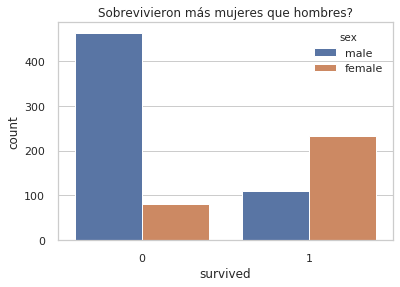

In [130]:
sns.countplot(x='survived', data=titanic, hue="sex")\
.set_title("Sobrevivieron más mujeres que hombres?")

### Boxplot

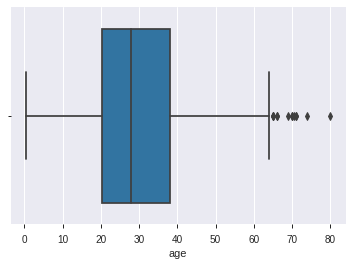

In [26]:
sns.boxplot(x='age', data=titanic)

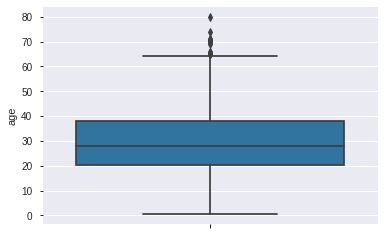

In [27]:
sns.boxplot(x='age', data=titanic, orient='v')

### FacetGrid

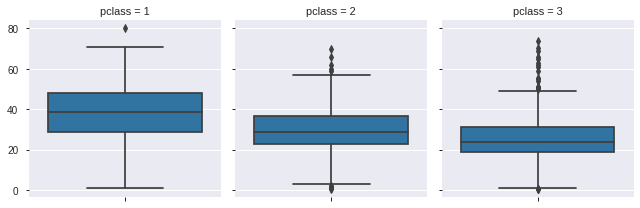

In [31]:
a = sns.FacetGrid(data=titanic, col='pclass')
a.map_dataframe(sns.boxplot, x='age', orient="v")